In [20]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
from keras import regularizers
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder


X = np.load('L:\ProjectWorks\Room_Service_drone\Project_NEW_Apporach\image\Listed\X.npy')
y = np.load('L:\ProjectWorks\Room_Service_drone\Project_NEW_Apporach\image\Listed\y.npy')

le = LabelEncoder()
y = le.fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [21]:
X_train = X_train.reshape(-1, 256, 256, 3)  
X_test = X_test.reshape(-1, 256, 256, 3)

csv_logger = keras.callbacks.CSVLogger("training_log3.csv", append=False)

num_classes = len(np.unique(y))
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

model = keras.Sequential([
    keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(256, 256, 3)),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Dropout(0.2),  # Adding dropout
    keras.layers.Conv2D(64, (3, 3), activation='relu'),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Dropout(0.2),  # Adding dropout
    keras.layers.Conv2D(128, (3, 3), activation='relu'),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Dropout(0.2),  # Adding dropout
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation='relu', kernel_regularizer=regularizers.l2(0.001)),  # Adding L2 regularization
    keras.layers.Dropout(0.5),  # Adding dropout
    keras.layers.Dense(num_classes, activation='softmax')
])

early_stopping = keras.callbacks.EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy', 'top_k_categorical_accuracy'])

batch_size = 32
epochs = 60
model.fit(X_train, y_train, batch_size=batch_size, epochs=epochs, validation_data=(X_test, y_test), callbacks=[ csv_logger])


c:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/60
86/86 ━━━━━━━━━━━━━━━━━━━━ 78s 891ms/step - accuracy: 0.0813 - loss: 263.7777 - top_k_categorical_accuracy: 0.4783 - val_accuracy: 0.1285 - val_loss: 3.3721 - val_top_k_categorical_accuracy: 0.4759
Epoch 2/60
86/86 ━━━━━━━━━━━━━━━━━━━━ 77s 890ms/step - accuracy: 0.1284 - loss: 3.2693 - top_k_categorical_accuracy: 0.4925 - val_accuracy: 0.1066 - val_loss: 3.3429 - val_top_k_categorical_accuracy: 0.5095
Epoch 3/60
86/86 ━━━━━━━━━━━━━━━━━━━━ 73s 847ms/step - accuracy: 0.1418 - loss: 3.2053 - top_k_categorical_accuracy: 0.5216 - val_accuracy: 0.1869 - val_loss: 3.1468 - val_top_k_categorical_accuracy: 0.5650
Epoch 4/60
86/86 ━━━━━━━━━━━━━━━━━━━━ 77s 901ms/step - accuracy: 0.2087 - loss: 2.9858 - top_k_categorical_accuracy: 0.6234 - val_accuracy: 0.3255 - val_loss: 2.9228 - val_top_k_categorical_accuracy: 0.6876
Epoch 5/60
86/86 ━━━━━━━━━━━━━━━━━━━━ 74s 863ms/step - accuracy: 0.2843 - loss: 2.7807 - top_k_categorical_accuracy: 0.6919 - val_accuracy: 0.3445 - val_loss: 2.8676 - va

In [36]:
model.save("CNN.keras")

In [35]:
evaluation_results = model.evaluate(X_test, y_test)
test_loss = evaluation_results[0]
test_accuracy = evaluation_results[1]
print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")

22/22 ━━━━━━━━━━━━━━━━━━━━ 4s 165ms/step - accuracy: 0.9287 - loss: 1.0530 - top_k_categorical_accuracy: 0.9878
Test Loss: 1.0474
Test Accuracy: 0.9241


In [26]:
y_train.shape

(2736, 17)

In [39]:
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score
from sklearn.metrics import roc_curve, auc
y_predict = model.predict(X_test)
y_pred_classes = np.argmax(y_predict, axis=1)
y_test_classes = np.argmax(y_test, axis=1)
precision = precision_score(y_test_classes, y_pred_classes, average='weighted')
recall = recall_score(y_test_classes, y_pred_classes, average='weighted')
f1 = f1_score(y_test_classes, y_pred_classes, average='weighted')
roc_auc = roc_auc_score(y_test, y_predict, average='macro', multi_class='ovo')
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("ROC AUC:", roc_auc)

22/22 ━━━━━━━━━━━━━━━━━━━━ 3s 147ms/step
Precision: 0.9266954124175186
Recall: 0.9240875912408759
F1 Score: 0.9238058813093698
ROC AUC: 0.9953933490927139


In [6]:
from tensorflow.keras.models import load_model
from tensorflow.keras.utils import plot_model
import pydot
print(pydot.__version__)


2.0.0


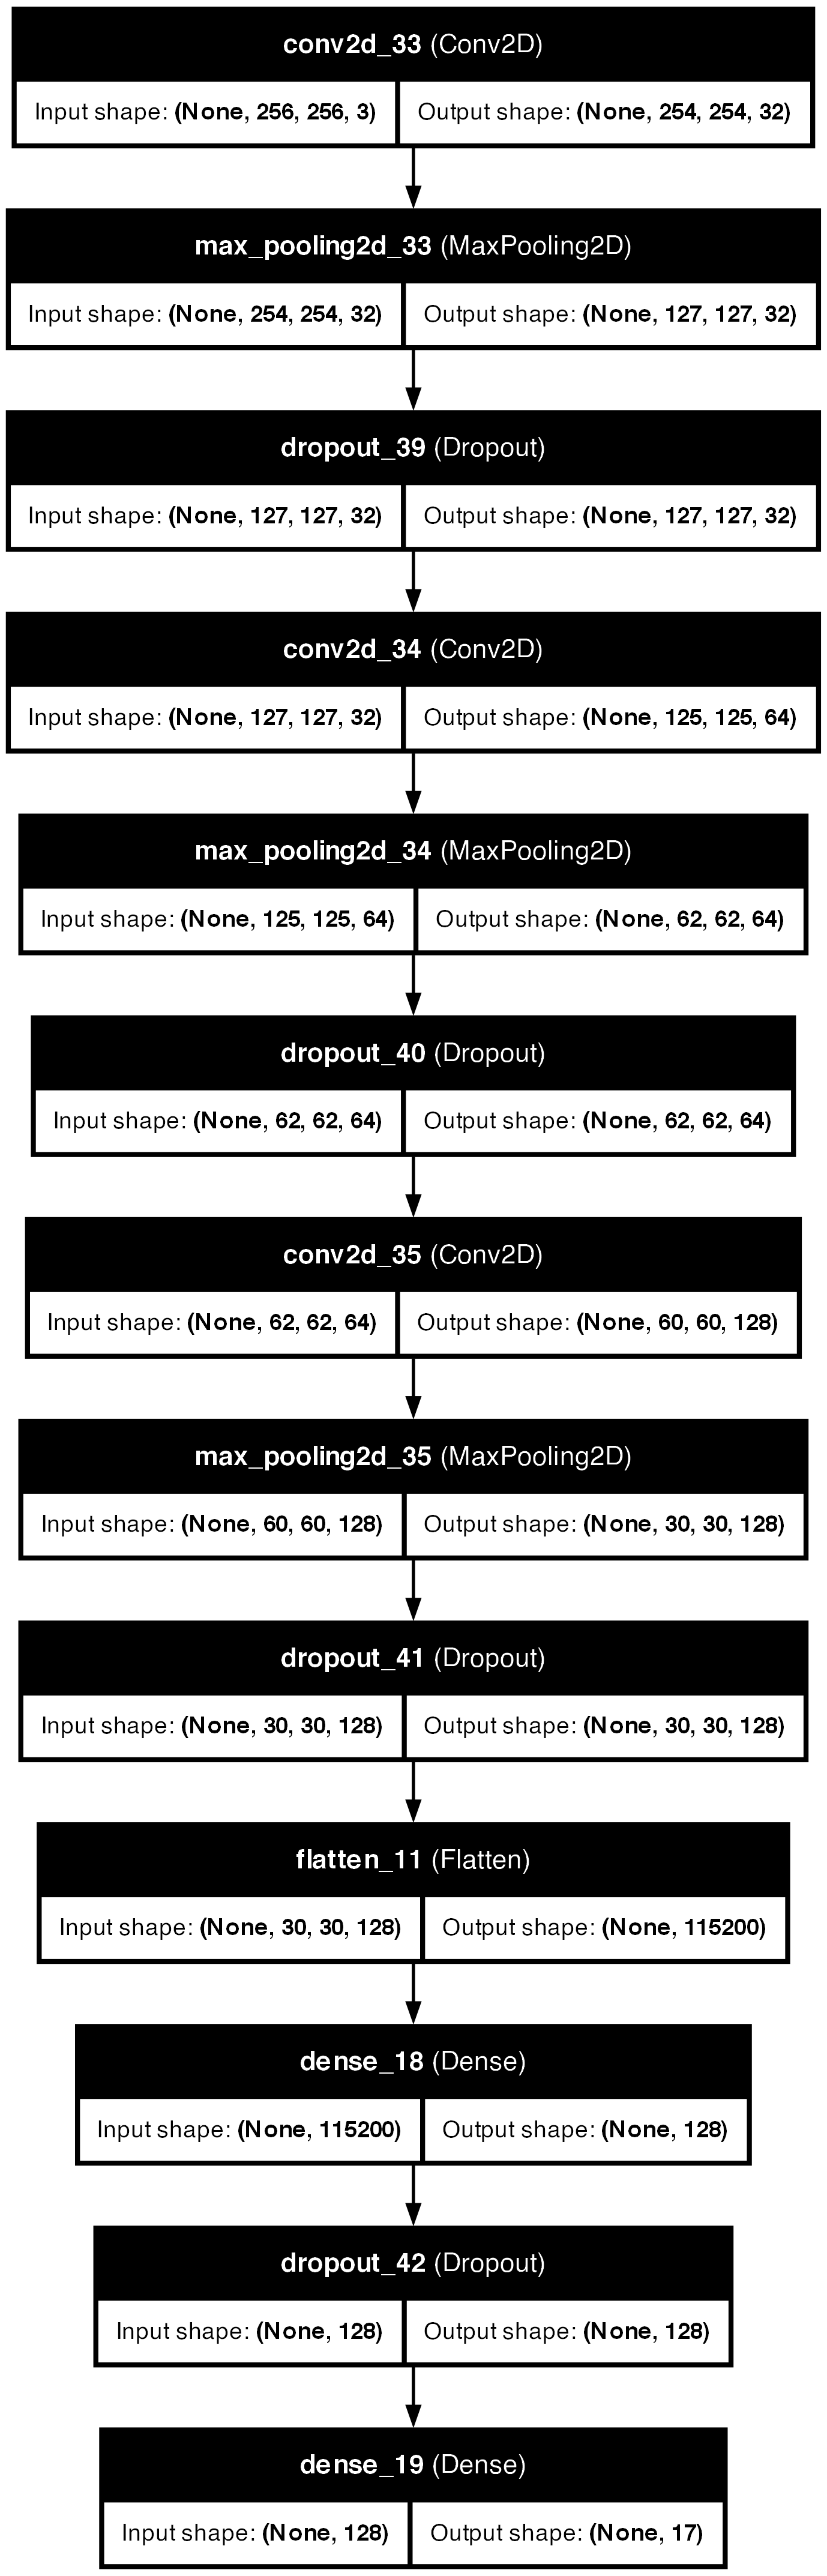

In [7]:
model_path = 'L:\ProjectWorks\Room_Service_drone\Project_NEW_Apporach\image\Listed\CNN.keras'
model = load_model(model_path)
plot_model(model, to_file='model_architecture.png', show_shapes=True, show_layer_names=True)

22/22 ━━━━━━━━━━━━━━━━━━━━ 4s 160ms/step - accuracy: 0.9287 - loss: 1.0530 - top_k_categorical_accuracy: 0.9878
Test Loss: 1.0474
Test Accuracy: 0.9241
22/22 ━━━━━━━━━━━━━━━━━━━━ 3s 147ms/step
Metrics for each class:
      Class    Accuracy   Precision      Recall    F1 Score     ROC AUC
0   IPE_401   97.956204   88.461538   93.243243   90.789474   99.430486
1   IPE_402   99.854015  100.000000   95.238095   97.560976   99.992828
2   IPE_403   98.394161   87.755102   89.583333   88.659794   99.679487
3   IPE_404   98.248175   90.625000   76.315789   82.857143   98.958757
4    ME_401   98.832117   92.207792   97.260274   94.666667   99.894798
5    ME_402   98.394161   90.000000   91.525424   90.756303   99.821303
6    ME_406   99.124088   94.117647   94.117647   94.117647   99.894848
7    ME_409   99.416058  100.000000   78.947368   88.235294   97.913703
8    ME_410   99.562044   92.592593   96.153846   94.339623   99.842419
9    ME_411   99.708029  100.000000   89.473684   94.444444   9

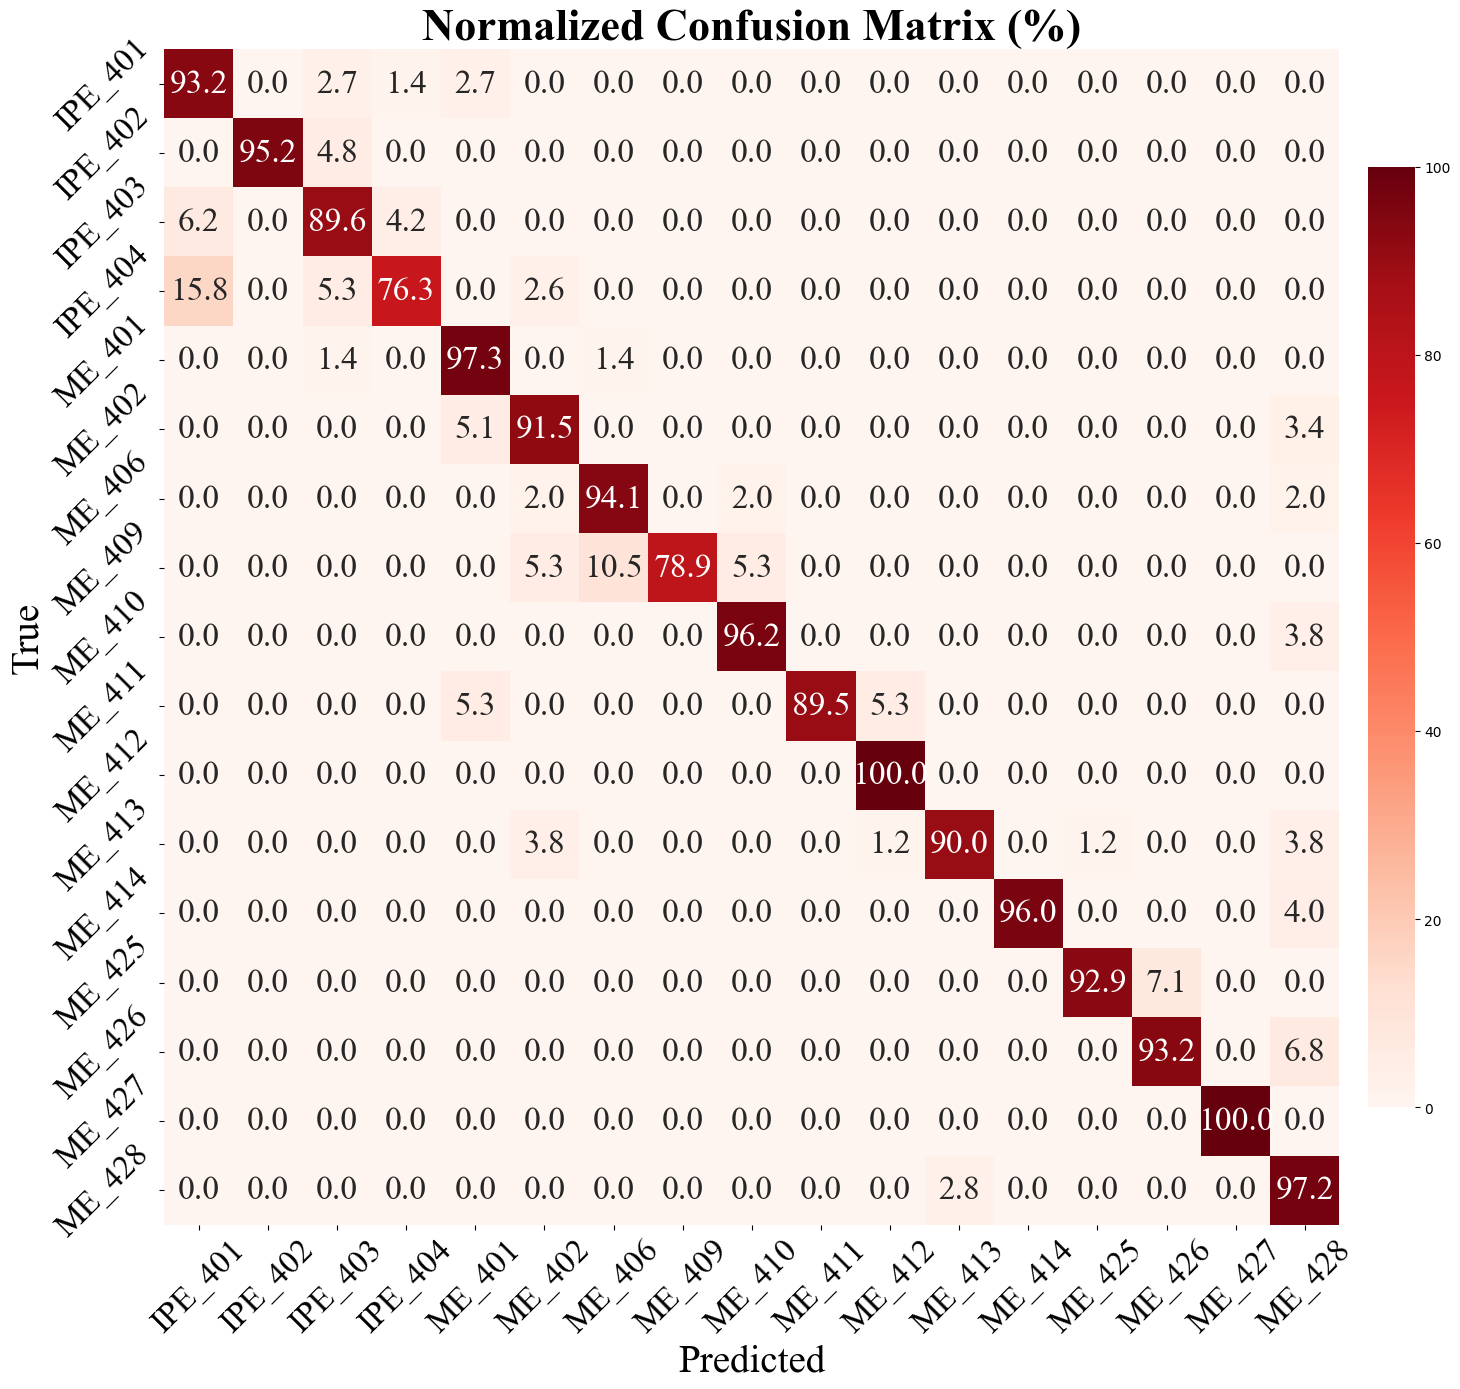

Confusion Matrix (Normalized):
[[ 93.24324324   0.           2.7027027    1.35135135   2.7027027
    0.           0.           0.           0.           0.
    0.           0.           0.           0.           0.
    0.           0.        ]
 [  0.          95.23809524   4.76190476   0.           0.
    0.           0.           0.           0.           0.
    0.           0.           0.           0.           0.
    0.           0.        ]
 [  6.25         0.          89.58333333   4.16666667   0.
    0.           0.           0.           0.           0.
    0.           0.           0.           0.           0.
    0.           0.        ]
 [ 15.78947368   0.           5.26315789  76.31578947   0.
    2.63157895   0.           0.           0.           0.
    0.           0.           0.           0.           0.
    0.           0.        ]
 [  0.           0.           1.36986301   0.          97.26027397
    0.           1.36986301   0.           0.           0.
    0.      

In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score, confusion_matrix
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
X = np.load('L:\\ProjectWorks\\Room_Service_drone\\Project_NEW_Apporach\\image\\Listed\\X.npy')
y = np.load('L:\\ProjectWorks\\Room_Service_drone\\Project_NEW_Apporach\\image\\Listed\\y.npy')

# Encode labels
le = LabelEncoder()
y = le.fit_transform(y)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train = X_train.reshape(-1, 256, 256, 3)
X_test = X_test.reshape(-1, 256, 256, 3)

# Convert labels to categorical
num_classes = len(np.unique(y))
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

# Load the saved model
model = keras.models.load_model('CNN.keras')

# Evaluate the model
evaluation_results = model.evaluate(X_test, y_test)
test_loss = evaluation_results[0]
test_accuracy = evaluation_results[1]
print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")

# Make predictions
y_predict = model.predict(X_test)
y_pred_classes = np.argmax(y_predict, axis=1)
y_test_classes = np.argmax(y_test, axis=1)

# Initialize dictionary to store metrics for each class
metrics_dict = {'Class': [], 'Accuracy': [], 'Precision': [], 'Recall': [], 'F1 Score': [], 'ROC AUC': []}

# Calculate metrics for each class
for i, class_label in enumerate(le.classes_):
    class_true = (y_test_classes == i).astype(int)
    class_pred = (y_pred_classes == i).astype(int)

    class_accuracy = accuracy_score(class_true, class_pred) * 100
    class_precision = precision_score(class_true, class_pred) * 100
    class_recall = recall_score(class_true, class_pred) * 100
    class_f1 = f1_score(class_true, class_pred) * 100
    class_roc_auc = roc_auc_score(class_true, y_predict[:, i]) * 100
    
    metrics_dict['Class'].append(class_label)
    metrics_dict['Accuracy'].append(class_accuracy)
    metrics_dict['Precision'].append(class_precision)
    metrics_dict['Recall'].append(class_recall)
    metrics_dict['F1 Score'].append(class_f1)
    metrics_dict['ROC AUC'].append(class_roc_auc)

# Convert metrics dictionary to DataFrame
metrics_df = pd.DataFrame(metrics_dict)

# Display metrics DataFrame
print("Metrics for each class:")
print(metrics_df)

# Calculate and plot confusion matrix
conf_matrix = confusion_matrix(y_test_classes, y_pred_classes)
conf_matrix_norm = conf_matrix.astype('float') / conf_matrix.sum(axis=1)[:, np.newaxis] * 100  # Normalize to percentage

# Set the size of the figure
plt.figure(figsize=(16, 14))

# Plot heatmap with adjusted annotation format and font size
sns.heatmap(conf_matrix_norm, annot=True, fmt='.1f', cmap='Reds', 
            xticklabels=le.classes_, yticklabels=le.classes_,
            cbar=True, annot_kws={"size": 24, "fontfamily": "Times New Roman"},
            cbar_kws={"shrink": 0.8, "pad": 0.02})

# Manually set tick labels font properties
plt.xticks(fontsize=24, fontfamily='Times New Roman', rotation=45)
plt.yticks(fontsize=24, fontfamily='Times New Roman', rotation=45)

plt.xlabel('Predicted', fontsize=28, fontfamily='Times New Roman')
plt.ylabel('True', fontsize=28, fontfamily='Times New Roman')
plt.title('Normalized Confusion Matrix (%)', fontsize=32, fontweight='bold', fontfamily='Times New Roman')

# Adjust layout to prevent cutoff of labels
plt.tight_layout()

# Save the plot as JPEG image
plt.savefig('normalized_confusion_matrix.jpg', dpi=1600, bbox_inches='tight')

# Show plot
plt.show()

print("Confusion Matrix (Normalized):")
print(conf_matrix_norm)
